In [1]:
#Figure 1 - final figure to Keynote - October 2023
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import glob

#import cmocean
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
cartopy.config["data_dir"] = './cartopy_shapefiles'

/appli/conda-env/2.7/obidam/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
#Add maps
path = '/home/datawork-lops-oh/biogeo/AI/CNN_CHLORO/trend_map/'
d1 = '2002-07'
d2 = '2020-12'
period = str(d1) + '_' + str(d2)
MULTIOBS_0 = xr.open_dataset(path + "Trend_log_chl_"+str(period)+"_multiobs.nc")
YU_0    = xr.open_dataset(path + "Trend_log_chl_"+str(period)+"_yu.nc")
AVW_0   = xr.open_dataset(path + "Trend_log_chl_"+str(period)+"_avw.nc")

CCI_0   = xr.open_dataset(path + "Trend_log_chl_"+str(period)+"_cci.nc")
GSM_0   = xr.open_dataset(path + "Trend_log_chl_"+str(period)+"_gsm.nc")
G_CMEMS_0 = xr.open_dataset(path + "Trend_log_chl_"+str(period)+"_globcolour_cmems.nc")

#CCI_pred   = xr.open_dataset(path + "Trend_log_chl_"+str(period)+"_CCIpred.nc")
#GSM_pred   = xr.open_dataset(path + "Trend_log_chl_"+str(period)+"_GSMpred.nc")
#G_CMEMS_pred = xr.open_dataset(path + "Trend_log_chl_"+str(period)+"_GCMEMSpred.nc")

#Apply mask to all maps
ds_input = xr.open_dataset('/home/datawork-lops-oh/biogeo/AI/CNN_CHLORO/INPUT/Input_obs9_1996.nc')
CCI_0 = CCI_0.where(ds_input['mask'] == 6,drop = True) 
GSM_0 = GSM_0.where(ds_input['mask'] == 6,drop = True) 
G_CMEMS_0  = G_CMEMS_0.where(ds_input['mask'] == 6,drop = True) 

#G_CMEMS_pred  = G_CMEMS_pred.where(ds_input['mask'] == 6,drop = True) 
#CCI_pred  = CCI_pred.where(ds_input['mask'] == 6,drop = True) 
#GSM_pred  = GSM_pred.where(ds_input['mask'] == 6,drop = True) 

AVW_0 = AVW_0.where(ds_input['mask'] == 6,drop = True) 
YU_0  = YU_0.where(ds_input['mask'] == 6,drop = True) 

res = ds_input.bathymetry.interp(longitude=MULTIOBS_0.longitude, latitude=MULTIOBS_0.latitude,method = 'linear')
MULTIOBS_0 = MULTIOBS_0.assign(variables={"bathymetry": (('latitude','longitude'), res.isel(time=0).data)})
MULTIOBS_0 = MULTIOBS_0.where(MULTIOBS_0.bathymetry < -200,drop = True)

AttributeError: 'DataArray' object has no attribute 'interp'

In [7]:
#cm = cmocean.cm.balance
cm = 'RdBu_r'
unit = '%.year$^{-1}$'
proj=ccrs.Robinson(central_longitude = 210)
land_feature = cfeature.NaturalEarthFeature(
category='physical', name='land', scale='50m', facecolor=[0.9375, 0.9375, 0.859375])
subplot_kw = {'projection': proj} 

ds_map    = [CCI_0       ,G_CMEMS_0             ,YU_0              ,AVW_0       ,MULTIOBS_0    ,GSM_0]
title_map = ['b) OC-CCI' ,'c) Globcolour CMEMS' ,'e) Yu et al 2023','d) Globcolour AVW'    , 'f) Multiobs CMEMS', 'a) Globcolour GSM']
w         = [1200       ,1200                  ,36525             ,1200       ,1200          ,1200]
colo      = ['black'      ,'tab:red'            ,'grey'            ,'tab:green' ,'tab:orange'  ,'tab:blue']

#ds_map    = [CCI_0       ,G_CMEMS_0            ,GSM_0               ,CCI_pred       ,G_CMEMS_pred            ,GSM_pred]
#title_map = ['a) OC-CCI' ,'c) Globcolour CMEMS', 'e) Globcolour GSM','b) OC-CCI predicted' ,'d) G-CMEMS predicted', 'f) GSM predicted']

#ds_map    = [CCI_pred       ,G_CMEMS_pred            ,GSM_pred]
#title_map = ['b) CCI predicted' ,'d) GCMEMS predicted', 'f) GSM predicted']

In [3]:
ls -t /home/datawork-lops-oh/biogeo/AI/CNN_CHLORO/trend_map/

Count_multiobs.nc
Trend_log_chl_2012-01_2020-12_avw.nc
Count_avw.nc
Trend_log_chl_2012-01_2020-12_cci.nc
Count_cci.nc
Trend_log_chl_2002-01_2011-12_multiobs.nc
Trend_log_chl_2002-01_2011-12_globcolour_cmems.nc
Count_globcolour_cmems.nc
Trend_log_chl_2002-01_2011-12_gsm.nc
Count_gsm.nc
Trend_log_chl_2002-01_2011-12_yu.nc
Count_yu.nc
Trend_log_chl_2002-01_2011-12_avw.nc
Trend_log_chl_2002-01_2011-12_cci.nc
Trend_log_chl_2012-01_2020-12_VIRpred.nc
Count_VIRpred.nc
Trend_log_chl_2012-01_2020-12_GSMpred.nc
Count_GSMpred.nc
Trend_log_chl_2012-01_2020-12_CCIpred.nc
Count_CCIpred.nc
Trend_log_chl_2012-01_2020-12_gsm.nc
EP_Pytorch-2023.01.yaml
Trend_log_chl_2012-01_2020-12_VIR.nc
Trend_log_chl_2015-2100_IPSL_pred.nc
Trend_log_chl_2015-2100_CMCC_pred.nc
Trend_log_chl_2015-2100_MPI_pred.nc
Trend_log_chl_2015-2100_CanESM5_pred.nc
Trend_log_chl_2015-2100_IPSL.nc
Trend_log_chl_2015-2100_CMCC.nc
Trend_log_chl_2015-2100_MPI.nc
Trend_log_chl_2015-2100_CanESM5.nc
Trend_log_chl_1997-09_2020-12_globcolour

TypeError: Cannot label gridlines on a Robinson plot.  Only PlateCarree and Mercator plots are currently supported.

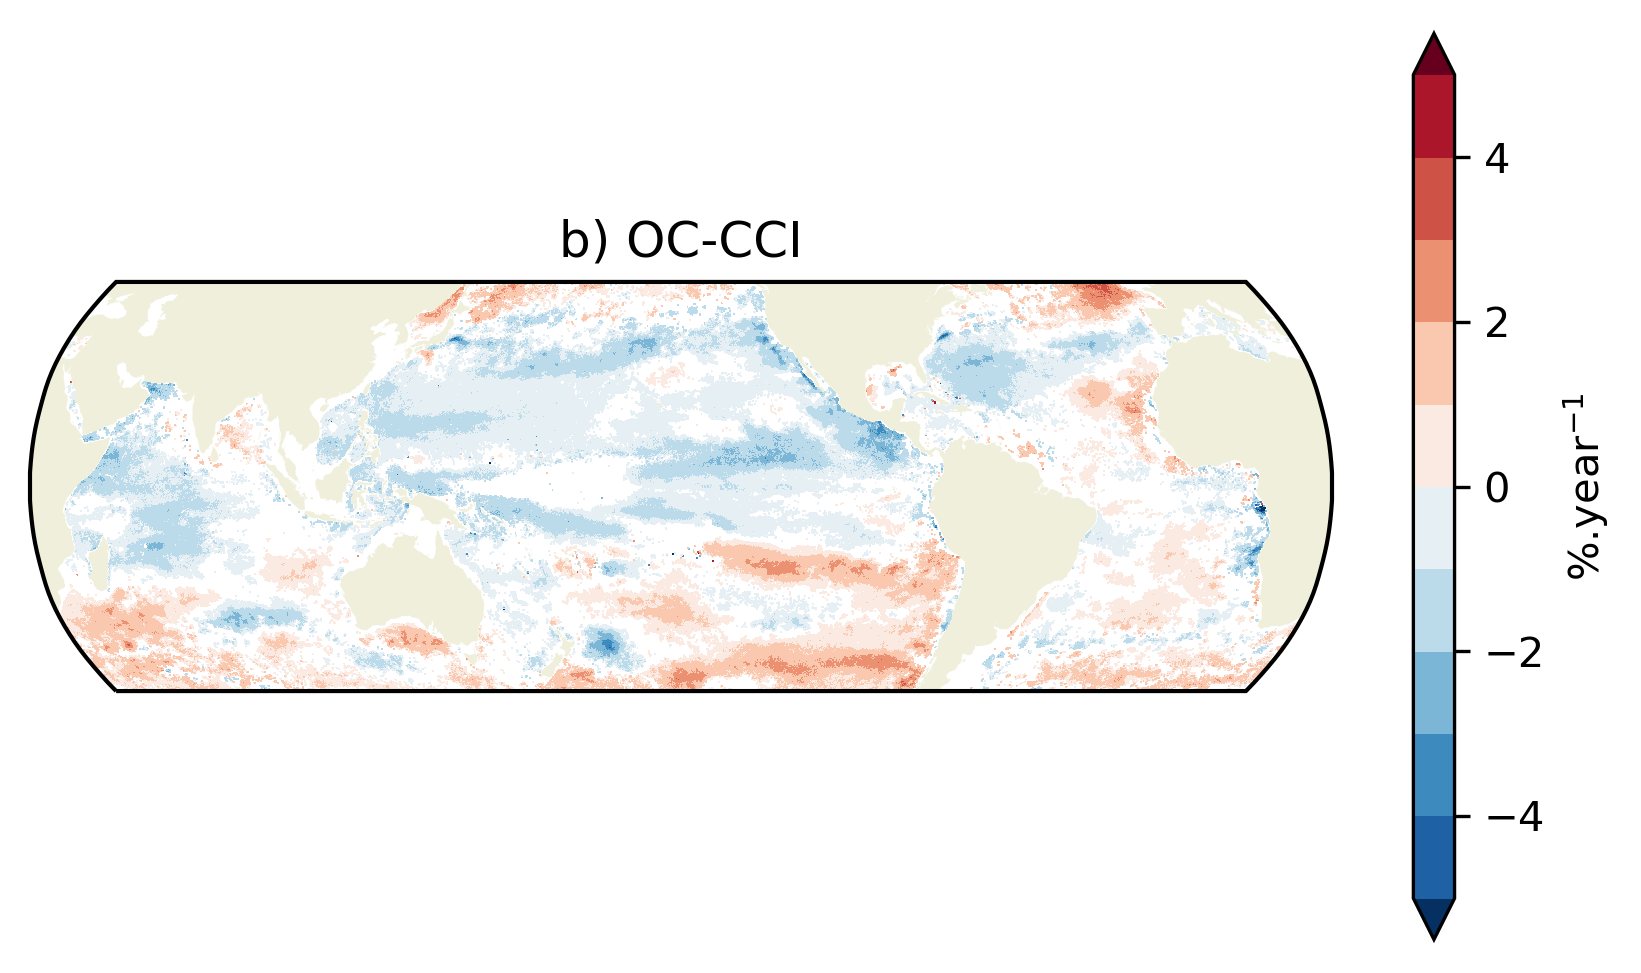

In [10]:
#Discrete white and 5
vm = 5
for i in np.arange(len(title_map)):
    ds_i = ds_map[i]
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7,4), dpi=300, subplot_kw=subplot_kw)
    ds_sig = ds_i.where(ds_i.sel(parameter='pvalue')<=0.05)
    (ds_sig.chl_deseason.sel(parameter='slope')*1200).plot(vmin = -vm,vmax = vm,cmap = cm,transform=ccrs.PlateCarree(),ax = ax
                                                ,cbar_kwargs=dict(label=unit),levels = 11)
    ax.set_title(title_map[i]) # + " (" + str(d1) + ' to ' + str(d2) + ')')
    ax.grid(True)
    ax.add_feature(land_feature) #, edgecolor='black')
    gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,linewidth=.5, color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = False
    gl.right_labels = False
    plt.savefig('Figure_GRL/Fig1_'+str(period)+'_'+str(title_map[i])+'_deseason.png', bbox_inches='tight')